# Organizando uma eleição
(créditos ao professor Rafael)

O último ano foi extremamente desafiador para você. Além de estarmos vivendo uma pandemia que aumentou nossa preocupação com a nossa própria vida e com nossos entes queridos e estarmos obrigados a passar mais tempo em casa para garantir nossa segurança, você se matriculou em um curso de programação e ciência de dados para mudar de rumo em sua carreira!

O _timing_ pareceu ideal: mais tempo em casa, mais tempo para estudar. Porém, você esbarrou em algumas dificuldades. O condomínio está em reforma, e você passa o dia ao som de marretadas no piso. Durante a noite, no horário da sua aula online, seus vizinhos - um casal passando por dificuldades na relação - costumam discutir em voz alta. A discussão deles frequentemente acorda o bebê do outro vizinho e todos os cachorros do andar no prédio. Deixar para estudar no final de semana não ajuda, pois o filho adolescente da família do apartamento logo acima do seu costuma trazer os colegas de banda para ensaiar. 

A situação se tornou insustentável, e o síndico - que é o mesmo senhorzinho desde que você se mudou para esse condomínio, há mais de 10 anos - não toma atitudes e não gosta de ser perturbado. Chegou a hora de organizar uma eleição para um novo síndico, e você tomou a iniciativa de montar um sistema eletrônico para auxiliar na votação.

## Entidades envolvidas

Podemos imaginar as seguintes entidades envolvidas na eleição:

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

Vamos pensar juntos em meios de implementar cada uma das classes.

### Morador

A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

In [7]:
class Morador:
    def __init__(self, cpf, nome, apartamento, voto = False):
        '''
        Construtor
        
        Parametros
        -----
        cpf = int
            CPF do morador cadastrado
        nome = str
            Nome do morador
        apartamento = int
            Numero do apartamento do morador
        voto = bool
            Indica se o morador já votou ou não na eleição
        '''
       #atributos

        self.cpf = cpf
        self.nome = nome
        self.apartamento = apartamento
        self.voto = voto
        
        #Encapsulamento do atributo voto
        @property
        def voto (self):
            return self.__voto

    def votar(self, urna, n_candidato_voto):
        '''
        Método para o morador deixar seu voto.

        Parametros
        -----
        urna = str
            Urna de votação do morador
        n_candidato_voto = int
            Número do candidato em que o morador irá votar
        ''' 
        #atributos
        self.urna = urna
        self.n_candidato_voto = n_candidato_voto
        self.voto = True
    
        ## identifica o candidato pelo id dele e atribui as variaveis necessárias
        for cpf in sistema.candidatos.keys():
            if sistema.candidatos[cpf].id_candidato == self.n_candidato_voto:
                urna.receber_votos(sistema.candidatos[cpf], self.apartamento)

### Candidato

Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0. 

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

In [8]:
class Candidato(Morador):
    def __init__(self, cpf, nome, apartamento, voto = False, id_candidato = None, votos = 0):
        super().__init__(cpf, nome, apartamento, voto = False)
        '''
        Construtor 
        Classe filha da classe Morador

        Parametros
        -----
        cpf = int
            CPF do morador que se candidatará
        nome = str
            Nome do morador que se candidatará
        apartamento = int
            Numero do apartamento do morador que se candidatará
        voto = bool
            Indica se o voto do morador que se candidatará foi computado
        id_candidato = int
            Mostra o número identificador do candidato
        votos = int
            Total de votos computados para o candidato
        '''
        #atributos
        self.id_candidato = id_candidato
        self.votos = votos
        
        #encapsulamento do atributo voto
        @property
        def voto (self):
            return self.__voto

### Apartamento

Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

In [9]:
class Apartamento:
    def __init__(self, n_apt, moradores = [], voto=False):
        '''
        Construtor

        Parametros
        -----
        n_apt = int
            Numero do apartamento
        moradores = list
            Moradores do apartamento informado
        voto = bool
            Identifica se o apartamento já teve seu voto computado
        '''
        #atributos
        self.n_apt = n_apt
        self.moradores = moradores
        self.voto = voto

        #Encapsulamento do atributo voto
        @property
        def voto (self):
            return self.__voto
            
    def visualizar_morador(self):
        '''
        Método para visualizar um morador especifico dentre os moradores do apartamento
        '''
        return self.moradores

    def cadastrar_morador(self, pessoa):
        '''
        Método para cadastrar morador ao apartamento.

        Paramêtros
        ----------
        pessoa : obj
        Morador ou Candidato que será atribuido para a aquele apartamento.
        '''
        self.morador = pessoa
        pessoa.apartamento = self.n_apt
        self.moradores.append(pessoa.nome)

### Urna
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número **único** para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

In [10]:
class Urna:

    def __init__ (self, sistema):
        '''
        Construtor

        Parametros
        -----
        sistema : obj
            Sistema responsavel por computar os votos e divulgar o resultado
        '''
        #atributos
        self.sistema = sistema
        self.apartamentos = lista_apts
        self.candidatos = []
        

    def atribuir_id_candidatos(self):
        '''
        Método gerador de número identificador de candidatos
        '''
        i=0
        for cpf in sistema.candidatos.keys():
            sistema.candidatos[cpf].id_candidato = 100 + i
            i+=1

            if sistema.candidatos[cpf].id_candidato not in self.candidatos:
                self.candidatos.append(sistema.candidatos[cpf].id_candidato)

        lista_candidatos = self.candidatos

    def receber_votos(self, candidato, apartamento):
        '''
        Método para receber os votos dos moradores representados por apartamentos no candidato escolhido

        Parametros
        -----
        candidato = int
            Número identificador do candidato escolhido pelo morador
        apartamento = int
            Número do apartamento do morador que está realizando o voto
        '''

        self.id_candidato = candidato
        self.apartamento = apartamento
        sistema.apartamentos[self.apartamento].voto = True
        candidato.votos+=1
        


## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidasna etapa anterior para criar uma urna.

* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

In [11]:


class Sistema:
    def __init__(self):
        '''
        Construtor

        '''
        #atributos
        self.residentes = {}
        self.candidatos = {}
        self.apartamentos = {}
        self.edificio = {}
        
    def cadastra_morador(self, cpf=None, nome=None, apartamento=None,voto=False):
        '''
        Método para cadastrar um candidato
        --------
        Parâmetros
        
        cpf = int
            CPF do candidato a ser cadastrado
        nome = str
            nome do candidato a ser cadastrado
        apartamento = int
            numero do apartamento do candidato a ser cadastrado
        voto = bool
            indica se o voto do candidato já foi computado

        '''
        #Define se é candidato
        check = input('Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato').upper()
        
        while check != 'M' and check != 'C':
            check = input('Opção incorreta! Digite apenas M ou C.\nDeseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato').upper()
            
        if check == 'C':
            if nome == None:            
                nome = input("Insira o nome do candidato: ")
            
            if apartamento == None:
                apartamento = input("Insira o número do apartamento (apenas números): ")
                
                while apartamento.isdigit() == False:
                    apartamento = input("Apartamento inválido!\n Por favor, insira o NÚMERO do apartamento (apenas números): ")   

            if cpf == None:
                while  True:
                    try:
                        cpf = int(input("Insira o número do CPF (apenas números): "))
                        break
                    except ValueError:
                        print('O CPF deve ser um número inteiro e ser válido!')
            
            else:
                if type(cpf) != int:
                    while True:
                        try:
                            cpf = int(input("Insira o número do CPF (apenas números): "))
                            break
                        except ValueError:
                            print('O CPF deve ser um número inteiro e ser válido!')


            if cpf in sistema.residentes.keys():
                return 'O CPF ja está cadastrado no prédio. Cadastro abortado.' 

            #Cria Candidato
            candidato = Candidato(cpf=cpf, nome=nome, apartamento=apartamento, voto=voto)        
            lista_candidatos.append(candidato.nome)
            self.candidatos[cpf] = candidato
            self.edificio[cpf] = candidato
        else:           
            if nome == None:            
                nome = input("Insira o nome do morador: ")
            
            if apartamento == None:
                apartamento = input("Insira o número do apartamento (apenas números): ")
                
                while apartamento.isdigit() == False:
                    apartamento = input("Apartamento inválido!\n Por favor, insira o NÚMERO do apartamento (apenas números): ")   

            if cpf == None:
                while  True:
                    try:
                        cpf = int(input("Insira o número do CPF (apenas números): "))
                        break
                    except ValueError:
                        print('O CPF deve ser um número inteiro e ser válido!')
            
            else:
                if type(cpf) != int:
                    while True:
                        try:
                            cpf = int(input("Insira o número do CPF (apenas números): "))
                            break
                        except ValueError:
                            print('O CPF deve ser um número inteiro e ser válido!')


            if cpf in sistema.residentes.keys():
                return 'O CPF ja está cadastrado no prédio. Cadastro abortado.'   

            #Cria Morador
            morador = Morador(cpf=cpf, nome=nome, apartamento=apartamento, voto=voto) 
            self.residentes[cpf] = morador
            self.edificio[cpf] = morador
        
        #CriaApartamento caso não exista
        apt_morador = apartamento

        if apt_morador not in lista_apts:
            lista_apts.append(apt_morador)
            apt = Apartamento(n_apt=apartamento, moradores=[], voto=False)
            self.apartamentos[apt_morador] = apt

        #Append a lista de moradores daquele apartamento
        if check == 'M':
            # Primeira forma que realizamos sem o método da classe apartamento.
            # self.apartamentos[apt_morador].moradores.append(morador.nome)
            self.apartamentos[apt_morador].cadastrar_morador(morador)
        else:
            # Primeira forma que realizamos sem o método da classe apartamento.
            #self.apartamentos[apt_morador].moradores.append(candidato.nome)
            self.apartamentos[apt_morador].cadastrar_morador(candidato)

In [13]:
#Configuração
lista_apts = []
lista_candidatos = []
sistema = Sistema()


#Cadastro de 
sistema.cadastra_morador()
sistema.cadastra_morador()
sistema.cadastra_morador(54930020402, 'Guilherme', 1)
sistema.cadastra_morador(11139432932, 'Luis', 2)
sistema.cadastra_morador(21395923210, 'Jorge', 3)
sistema.cadastra_morador(10012395823, 'Miguel', 4)
sistema.cadastra_morador(43953032032, 'Ana', 5)
sistema.cadastra_morador(23121233534, 'Caue', 6)
sistema.cadastra_morador(11234525352, 'Beatriz', 6)
sistema.cadastra_morador(23123243534, 'Fabiana', 7)
sistema.cadastra_morador(23123243533, 'Fabiano', 7)
sistema.cadastra_morador(43254533432, 'Mariana', 8)
sistema.cadastra_morador(23534333432, 'Fabricio', 8)
sistema.cadastra_morador(94923929101, 'Ana', 9)
sistema.cadastra_morador(43940123949, 'Barbara', 10)
sistema.cadastra_morador(92482042032, 'Barbaro', 10)
sistema.cadastra_morador(43940123949, 'Amanda', 11)

# Urna
urna = Urna(sistema)
urna.atribuir_id_candidatos()


Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato M
Insira o nome do morador:  Lucas
Insira o número do apartamento (apenas números):  301
Insira o número do CPF (apenas números):  1233123331
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato C
Insira o nome do candidato:  Alvaro
Insira o número do apartamento (apenas números):  302
Insira o número do CPF (apenas números):  112233112233
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato M
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato M
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato C
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato C
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato M
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato M
Deseja cadastrar um morador ou um Candidato? M - Morador // C - Candidato C
Deseja cadastrar um morador ou 

In [14]:
# VotaçãO
## Candidatos Disponíveis
print('ELEIÇÃO PRÉDIO')
print('-------------')
print('Nome ----- ID')
print('-------------')
for candidato in sistema.candidatos.keys():
    print(sistema.candidatos[candidato].nome, sistema.candidatos[candidato].id_candidato)
print('-------------')

while True:


    ## Sistema de Votos por Residente
    for residente in sistema.edificio.keys():
        ap = sistema.edificio[residente].apartamento
        
        #Check se o ap Votou
        if sistema.apartamentos[ap].voto == True:
            continue
            print(1)
        
        voto_morador = input(f'Morador: {sistema.edificio[residente].nome} - Apartamento: {sistema.edificio[residente].apartamento}\nInforme o candidato desejado: ')
        while not voto_morador.isdigit() or int(voto_morador) not in urna.candidatos:
            voto_morador = input(f'Valor inválido! Morador: {sistema.edificio[residente].nome} - Apartamento: {sistema.edificio[residente].apartamento}\nInforme o candidato desejado: ')

        voto_morador = int(voto_morador)
        # método votar da classe morador
        sistema.edificio[residente].votar(urna, voto_morador)
        print(f'{sistema.edificio[residente].nome} votou.')
        print('-------------')
    


    ## Imprimir resultados
    print('-------------')
    print('RESULTADOS')
    print('-------------')
    list_candidatos_final = []
    list_votos_final = []
    for candidato in sistema.candidatos.keys():
        list_votos_final.append(sistema.candidatos[candidato].votos)
    max_votos = max(list_votos_final)

    for candidato in sistema.candidatos.keys():
        if sistema.candidatos[candidato].votos == max_votos:
            list_candidatos_final.append(sistema.candidatos[candidato])

    if len(list_candidatos_final) == 1:
        print(f'\nO candidato vencedor é: {list_candidatos_final[0].nome}\n Apartamento: {list_candidatos_final[0].apartamento}\n Número de Votos: {list_candidatos_final[0].votos}')

    if len(list_candidatos_final) > 1:
        print('Houve um empate entre os candidatos:')

        for candidato in sistema.candidatos.keys():
            print(f'Nome: {sistema.candidatos[candidato].nome}')
            print(f'Apartamento: {sistema.candidatos[candidato].apartamento}')
            print(f'Votos: {sistema.candidatos[candidato].votos}')
            print('--')

    break


        

ELEIÇÃO PRÉDIO
-------------
Nome ----- ID
-------------
Alvaro 100
Jorge 101
Miguel 102
Beatriz 103
Mariana 104
Ana 105
Barbaro 106
-------------


Morador: Lucas - Apartamento: 301
Informe o candidato desejado:  102


Lucas votou.
-------------


Morador: Alvaro - Apartamento: 302
Informe o candidato desejado:  100


Alvaro votou.
-------------


Morador: Guilherme - Apartamento: 1
Informe o candidato desejado:  102


Guilherme votou.
-------------


Morador: Luis - Apartamento: 2
Informe o candidato desejado:  104


Luis votou.
-------------


Morador: Jorge - Apartamento: 3
Informe o candidato desejado:  104


Jorge votou.
-------------


Morador: Miguel - Apartamento: 4
Informe o candidato desejado:  104


Miguel votou.
-------------


Morador: Ana - Apartamento: 5
Informe o candidato desejado:  105


Ana votou.
-------------


Morador: Caue - Apartamento: 6
Informe o candidato desejado:  104


Caue votou.
-------------


Morador: Fabiana - Apartamento: 7
Informe o candidato desejado:  104


Fabiana votou.
-------------


Morador: Mariana - Apartamento: 8
Informe o candidato desejado:  105


Mariana votou.
-------------


Morador: Ana - Apartamento: 9
Informe o candidato desejado:  102


Ana votou.
-------------


Morador: Barbara - Apartamento: 10
Informe o candidato desejado:  100


Barbara votou.
-------------
-------------
RESULTADOS
-------------

O candidato vencedor é: Mariana
 Apartamento: 8
 Número de Votos: 5


## Dicas

* Métodos mágicos: no mínimo uma _representação imprimível_ dos objetos de cada classe seria desejável para facilitar a sua vida. No caso de um morador, podemos imprimir seu nome e número do apartamento. No caso de um candidato, poderíamos incluir o número da urna. No caso do apartamento, seria legal imprimir todos os moradores. E no caso da urna, podemos ter dois casos: antes da votação acabar, apenas a lista de apartamentos que já votou deveria ser impressa. Após o término da votação, ela deveria imprimir quantos votos cada candidato recebeu e qual deles venceu.

* Arquivos e testes: note que vocês sempre foram orientados a passar dados por parâmetros **ou** digitá-los. Se você bolar um esquema inteligente com arquivos em formato padronizado (como CSV) e organizar direitinho seu programa principal, você consegue gerar um único arquivo com todos os moradores e suas respectivas informações (número do apartamento, se é ou não candidato e em quem gostaria de votar) e automatizar completamente as etapas do seu programa.

* Segurança adicional: atualmente, cada apartamento armazena a informação se já votou ou não. Mas e se o apartamento pudesse alterar essa informação e enganar a urna? Você pode colocar uma camada redundante de segurança fazendo com que a urna TAMBÉM controle quais apartamentos já votaram. Mesmo que o apartamento diga que não votou, se a urna está registrando que ele votou, então um hipotético segundo voto deve ser recusado. Veja se consegue pensar em outras possíveis falhas de segurança em potencial no programa. Lembre-se sempre de pensar do ponto de vista de uma classe e "desconfiar" das outras.

* Criatividade: os enunciados trazem o **mínimo** que você precisa fazer para que o seu programa funcione como foi planejado. Isso não impede que você crie outros métodos, acrescente informações que possam ser úteis e até mesmo crie outras classes para modelar melhor outros fatores que poderiam ser considerados na organização da sua eleição.


## Bônus: representação visual dos votos

A função abaixo gera um gráfico de barras mostrando quantos votos cada candidato teve! Cole-a em sua classe Urna e faça os devidos ajustes para que ela use os atributos da Urna ao invés dos parâmetros utilizados. 

O programinha na célula seguinte apenas ilustra o funcionamento da função.


In [15]:
import matplotlib.pyplot as plt

def graficoVotos(candidatos, votos):
    plt.bar(candidatos, votos)
    plt.title('Resultado das eleições')
    plt.xlabel('Candidatos')
    plt.ylabel('Votos')
    

In [16]:
lista_grafico_candidatos = []
lista_grafico_votos = []

for candidato in sistema.candidatos.keys():
    lista_grafico_candidatos.append(sistema.candidatos[candidato].nome)
    lista_grafico_votos.append(sistema.candidatos[candidato].votos)

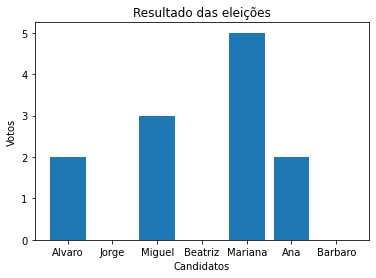

In [17]:
candidatos = lista_grafico_candidatos
votos = lista_grafico_votos

graficoVotos(candidatos, votos)